In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [40]:
data = pd.read_csv('results.csv')
data['vector_size'] = data['vector_size'].astype(int)
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_"]

In [13]:
data.head()

,model,class,construction,sentence_source,casing,vector_size,micro_avg,macro_avg,mc_30,mc_30_oov,...,simverb_3500_oov,ws_353_all,ws_353_all_oov,ws_353_rel,ws_353_rel_oov,ws_353_sim,ws_353_sim_oov,yp_130,yp_130_oov,total_found
0,bert_2nd_to_last,bert,complete,all,cased,768,0.465,0.547,0.794,0%,...,0%,0.501,0%,0.423,0%,0.591,0%,0.500,0%,11624
1,bert_2nd_to_last,bert,complete,all,uncased,768,0.467,0.555,0.794,0%,...,0%,0.537,4%,0.485,5%,0.593,3%,0.500,0%,11587
2,bert_2nd_to_last,bert,complete,dict,cased,768,0.408,0.479,0.757,0%,...,0%,0.409,0%,0.365,0%,0.473,0%,0.465,0%,11624
3,bert_2nd_to_last,bert,complete,dict,uncased,768,0.482,0.558,0.861,0%,...,0%,0.479,0%,0.409,0%,0.588,0%,0.570,0%,11624
4,bert_2nd_to_last,bert,complete,random,cased,768,0.432,0.525,0.819,0%,...,0%,0.527,0%,0.413,0%,0.625,0%,0.469,0%,11624


In [14]:
data.columns

Index(['model', 'class', 'construction', 'sentence_source', 'casing',
       'vector_size', 'micro_avg', 'macro_avg', 'mc_30', 'mc_30_oov',
       'men_tr_3k', 'men_tr_3k_oov', 'mturk_287', 'mturk_287_oov', 'mturk_771',
       'mturk_771_oov', 'rg_65', 'rg_65_oov', 'rw_stanford', 'rw_stanford_oov',
       'simlex999', 'simlex999_oov', 'simverb_3500', 'simverb_3500_oov',
       'ws_353_all', 'ws_353_all_oov', 'ws_353_rel', 'ws_353_rel_oov',
       'ws_353_sim', 'ws_353_sim_oov', 'yp_130', 'yp_130_oov', 'total_found'],
      dtype='object')

In [15]:
data['model'].unique()

array(['bert_2nd_to_last', 'bert_2nd_to_last_elmo', 'bert_first',
       'bert_first_elmo', 'bert_last', 'bert_last_elmo',
       'bert_sum_all_12', 'bert_sum_all_12_elmo', 'bert_sum_last_4',
       'bert_sum_last_4_elmo', 'bert_sum_last_four', 'd2v_50M',
       'd2v_enwiki', 'd2v_enwiki_100_7', 'dft_50M', 'dft_enwiki', 'elmo',
       'ft_50M', 'glove_100_ws12', 'glove_100_ws12_elmo',
       'glove_100_ws15', 'glove_100_ws15_elmo', 'glove_100_ws3',
       'glove_100_ws3_elmo', 'glove_200_ws12', 'glove_200_ws12_elmo',
       'glove_200_ws15', 'glove_200_ws15_elmo', 'glove_200_ws3',
       'glove_200_ws3_elmo', 'glove_300_ws12', 'glove_300_ws12_elmo',
       'glove_300_ws15', 'glove_300_ws15_elmo', 'glove_300_ws3',
       'glove_300_ws3_elmo', 'sw_50M', 'w2v_50M'], dtype=object)

## BERT

In [22]:
data_bert = data[(data['class'] == 'bert')]

In [17]:
data_bert

,model,class,construction,sentence_source,casing,vector_size,micro_avg,macro_avg,mc_30,mc_30_oov,...,simverb_3500_oov,ws_353_all,ws_353_all_oov,ws_353_rel,ws_353_rel_oov,ws_353_sim,ws_353_sim_oov,yp_130,yp_130_oov,total_found
0,bert_2nd_to_last,bert,complete,all,cased,768,0.465,0.547,0.794,0%,...,0%,0.501,0%,0.423,0%,0.591,0%,0.500,0%,11624
1,bert_2nd_to_last,bert,complete,all,uncased,768,0.467,0.555,0.794,0%,...,0%,0.537,4%,0.485,5%,0.593,3%,0.500,0%,11587
2,bert_2nd_to_last,bert,complete,dict,cased,768,0.408,0.479,0.757,0%,...,0%,0.409,0%,0.365,0%,0.473,0%,0.465,0%,11624
3,bert_2nd_to_last,bert,complete,dict,uncased,768,0.482,0.558,0.861,0%,...,0%,0.479,0%,0.409,0%,0.588,0%,0.570,0%,11624
4,bert_2nd_to_last,bert,complete,random,cased,768,0.432,0.525,0.819,0%,...,0%,0.527,0%,0.413,0%,0.625,0%,0.469,0%,11624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,bert_sum_last_4,bert,sent,random,uncased,768,0.519,0.592,0.874,0%,...,0%,0.559,0%,0.445,0%,0.689,0%,0.557,0%,11121
90,bert_sum_last_4,bert,word,-,cased,768,0.229,0.289,0.338,0%,...,0%,0.351,0%,0.422,0%,0.315,0%,0.248,0%,11624
91,bert_sum_last_4,bert,word,-,uncased,768,0.253,0.361,0.581,0%,...,0%,0.452,0%,0.346,0%,0.517,0%,0.229,0%,11624
98,bert_sum_last_four,bert,sent,all,cased,768,0.510,0.588,0.808,0%,...,0%,0.556,0%,0.462,0%,0.647,0%,0.556,0%,11476


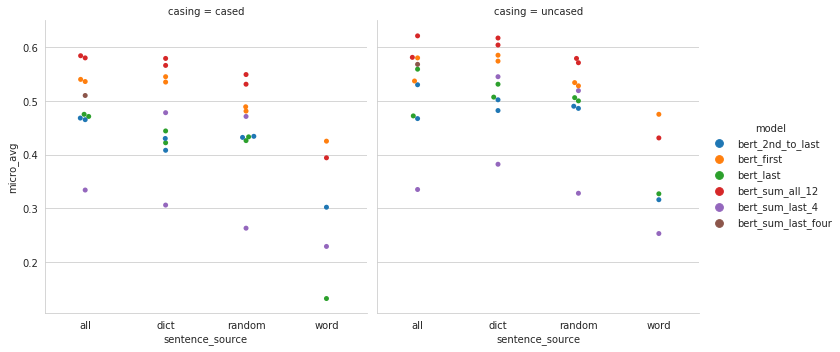

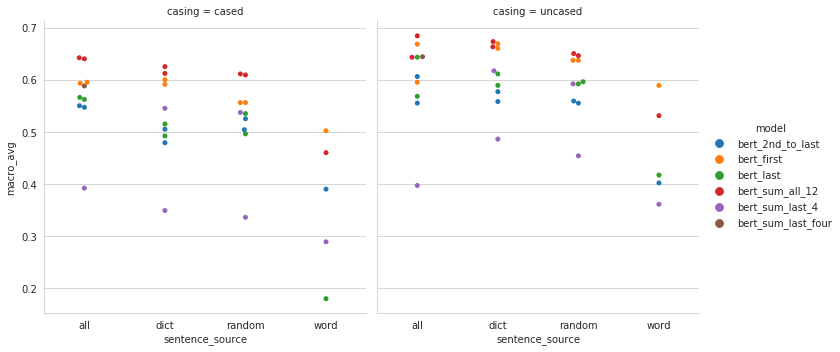

In [23]:
sns.catplot(x='sentence_source', y='micro_avg', col='casing', hue='model',data=data_bert, kind='swarm')
sns.catplot(x='sentence_source', y='macro_avg', col='casing', hue='model',data=data_bert, kind='swarm')

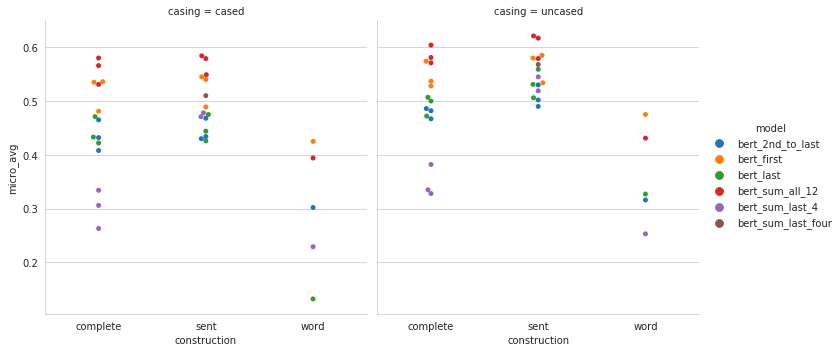

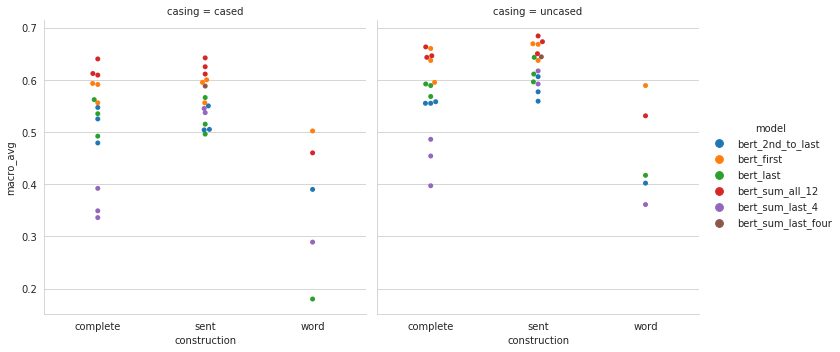

In [24]:
sns.catplot(x='construction', y='micro_avg', col='casing', hue='model',data=data_bert, kind='swarm')
sns.catplot(x='construction', y='macro_avg', col='casing', hue='model',data=data_bert, kind='swarm')

## ELMO

In [41]:
data_elmo = data[data['class'].isin(["elmo", "glove_elmo"])]
data_elmo_bert = data[data['class'].isin(["elmo","bert_elmo"])]

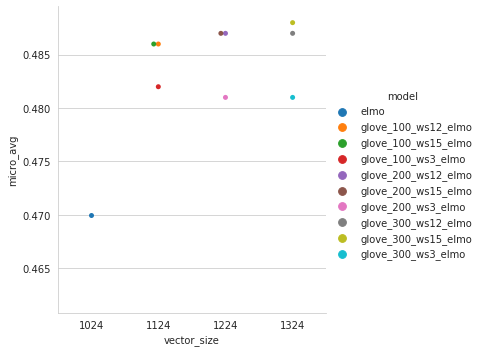

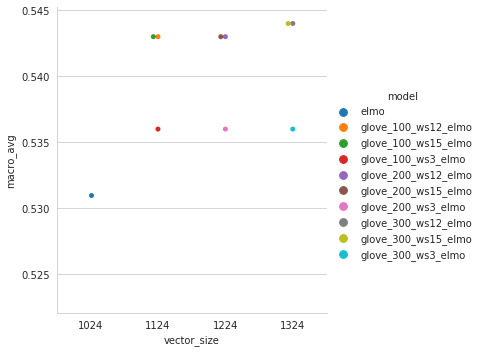

In [43]:
sns.catplot(x='vector_size', y='micro_avg', hue='model', data=data_elmo, kind='swarm')#, markers=markers)
sns.catplot(x='vector_size', y='macro_avg', hue='model', data=data_elmo, kind='swarm')#, markers=markers)

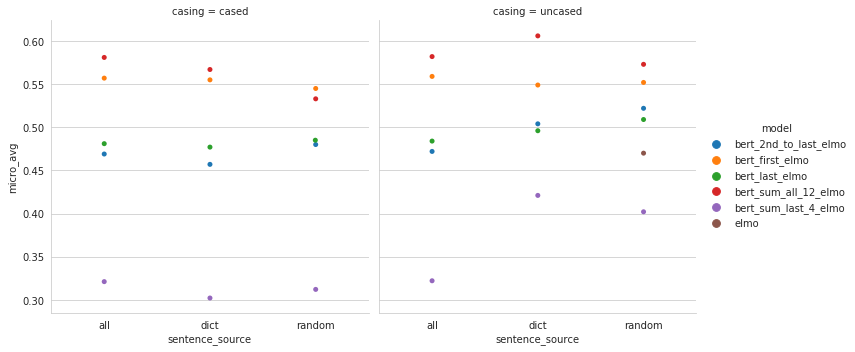

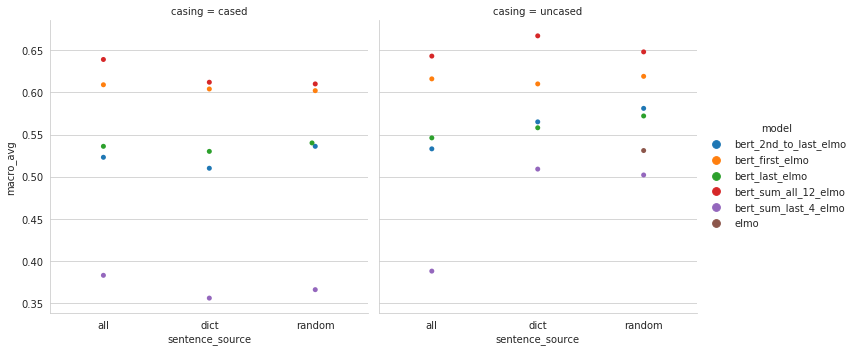

In [44]:
sns.catplot(x='sentence_source', y='micro_avg', col='casing', hue='model',data=data_elmo_bert, kind='swarm')
sns.catplot(x='sentence_source', y='macro_avg', col='casing', hue='model',data=data_elmo_bert, kind='swarm')

## GLOVE

In [45]:
data_glove = data[data['class'] == "glove"]

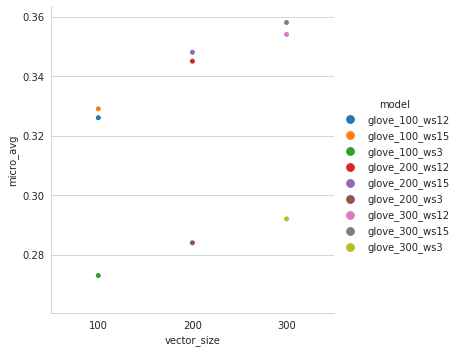

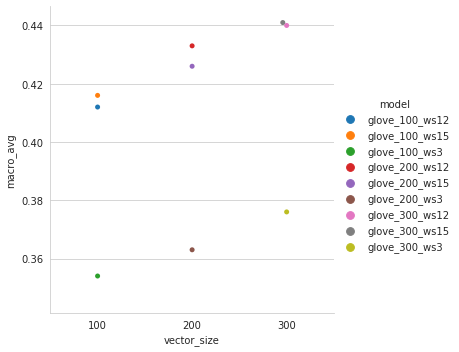

In [46]:
sns.catplot(x='vector_size', y='micro_avg', hue='model',data=data_glove, kind='swarm')
sns.catplot(x='vector_size', y='macro_avg', hue='model',data=data_glove, kind='swarm')

## ALL

In [49]:
data[(data['casing']=='uncased')][['model','vector_size', 'sentence_source', 'macro_avg']].sort_values(['macro_avg'], ascending=False)[:25]

,model,vector_size,sentence_source,macro_avg
67,bert_sum_all_12,768,all,0.684
69,bert_sum_all_12,768,dict,0.673
103,dft_50M,300,-,0.670
100,d2v_50M,100,-,0.669
29,bert_first,768,dict,0.669
27,bert_first,768,all,0.668
77,bert_sum_all_12_elmo,1792,dict,0.667
63,bert_sum_all_12,768,dict,0.663
23,bert_first,768,dict,0.660
71,bert_sum_all_12,768,random,0.650


In [51]:
all_micro = data[['model','vector_size', 'sentence_source', 'casing', 'micro_avg']].sort_values('micro_avg', ascending=False).groupby('model').head(1)
print(all_micro[:5])
all_macro = data[['model','vector_size', 'sentence_source', 'casing', 'macro_avg']].sort_values('macro_avg', ascending=False).groupby('model').head(1)
all_macro[:5]

                    model  vector_size sentence_source   casing  micro_avg
67        bert_sum_all_12          768             all  uncased      0.621
77   bert_sum_all_12_elmo         1792            dict  uncased      0.606
100               d2v_50M          100               -  uncased      0.587
103               dft_50M          300               -  uncased      0.587
29             bert_first          768            dict  uncased      0.585


,model,vector_size,sentence_source,casing,macro_avg
67,bert_sum_all_12,768,all,uncased,0.684
103,dft_50M,300,-,uncased,0.670
100,d2v_50M,100,-,uncased,0.669
29,bert_first,768,dict,uncased,0.669
77,bert_sum_all_12_elmo,1792,dict,uncased,0.667


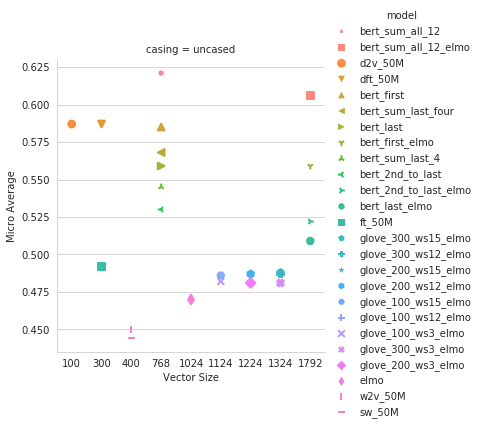

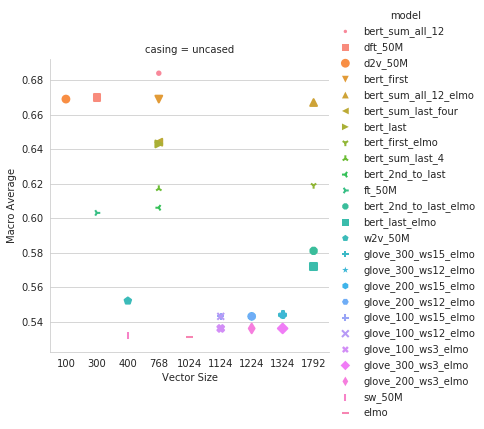

In [53]:
sns.catplot(x='vector_size', y='micro_avg', col='casing', hue='model',data=all_micro[:25], kind='point', markers=markers).set(xlabel='Vector Size', ylabel='Micro Average')
sns.catplot(x='vector_size', y='macro_avg', col='casing', hue='model',data=all_macro[:25], kind='point', markers=markers).set(xlabel='Vector Size', ylabel='Macro Average')

# Diffvec

In [63]:
diffvec = pd.read_csv('results_diffvec.csv')
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_"]
colors = sns.color_palette("hls", 25)

In [55]:
diffvec_bert = diffvec[diffvec['class'] == 'bert']

In [56]:
diffvec_bert_cased = diffvec_bert[diffvec_bert['case']=='cased']
diffvec_bert_uncased = diffvec_bert[diffvec_bert['case']=='uncased']

In [57]:
diffvec_bert_cased[(diffvec_bert_cased['construction']=='sent')&(diffvec_bert_cased['nclusters']==10)]

,model,class,construction,sentence_source,case,nclusters,vmeasure
48,bert_2nd_to_last,bert,sent,all,cased,10,0.366
64,bert_2nd_to_last,bert,sent,dict,cased,10,0.345
80,bert_2nd_to_last,bert,sent,random,cased,10,0.310
192,bert_first,bert,sent,all,cased,10,0.358
208,bert_first,bert,sent,dict,cased,10,0.353
224,bert_first,bert,sent,random,cased,10,0.327
336,bert_last,bert,sent,all,cased,10,0.372
352,bert_last,bert,sent,dict,cased,10,0.330
368,bert_last,bert,sent,random,cased,10,0.325
480,bert_sum_all_12,bert,sent,all,cased,10,0.421


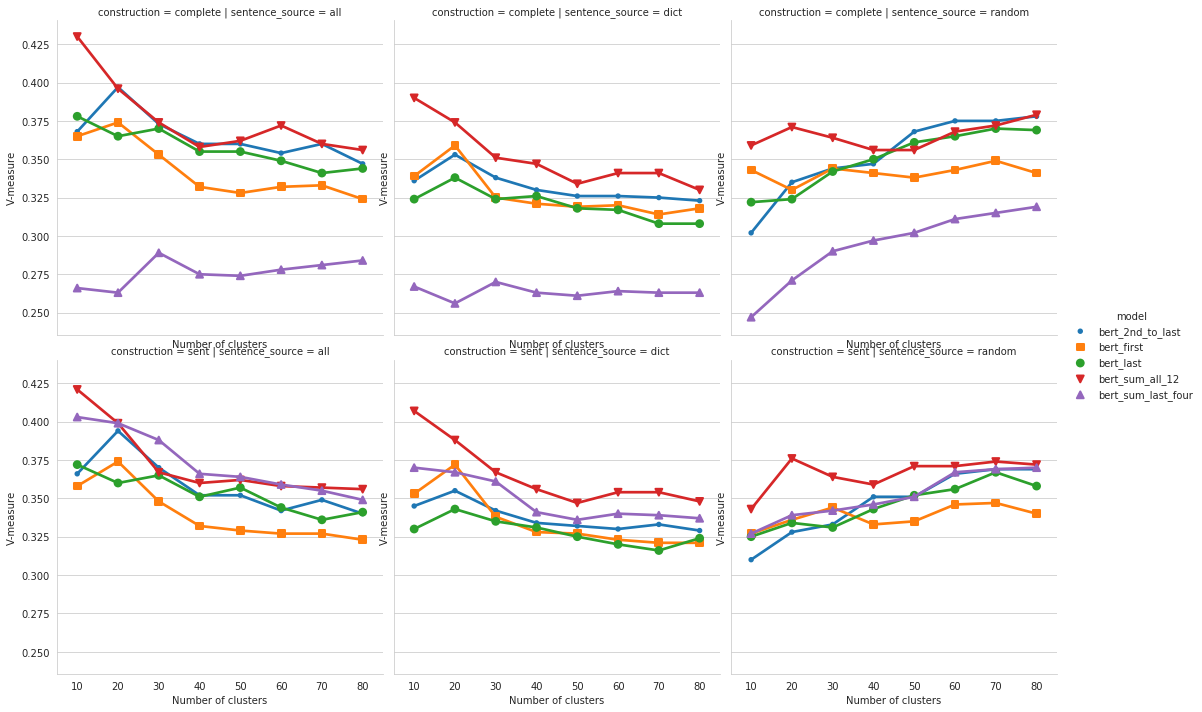

In [19]:
sns.catplot(x='nclusters', y='vmeasure', row='construction', col='sentence_source',hue='model',data=diffvec_bert_cased[diffvec_bert_cased['sentence_source']!='word'], kind='point', markers=markers).set(ylabel='V-measure', xlabel='Number of clusters')

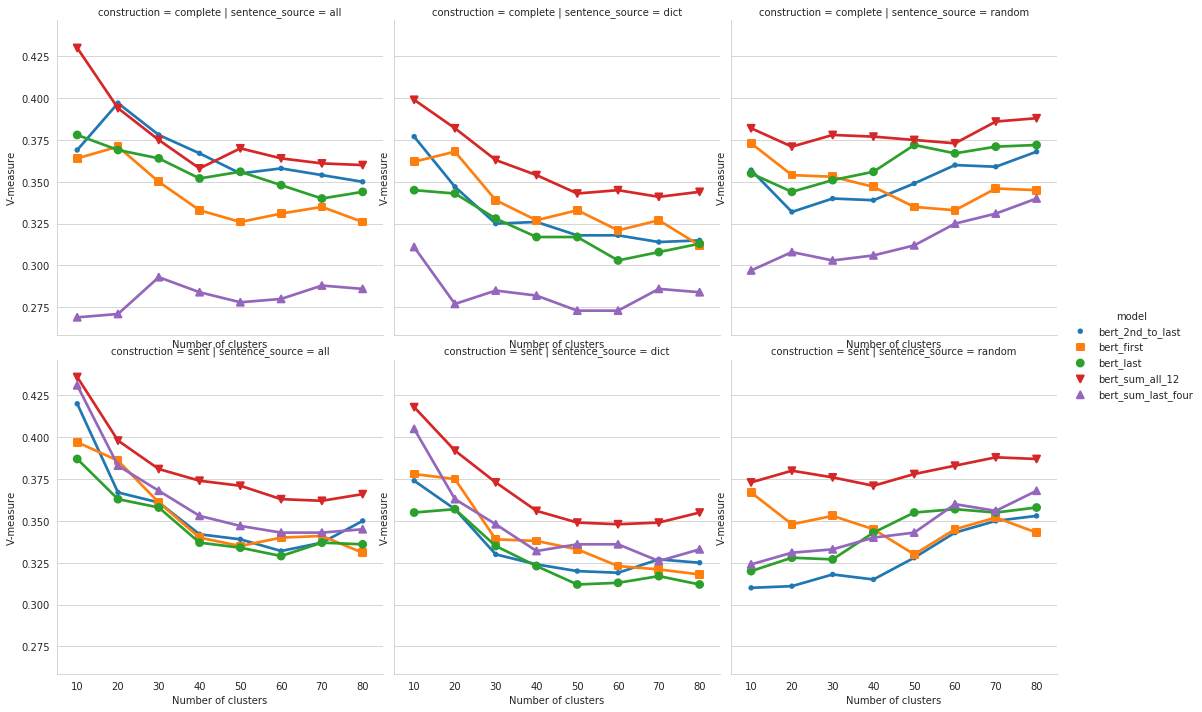

In [20]:
sns.catplot(x='nclusters', y='vmeasure', row='construction', col='sentence_source',hue='model',data=diffvec_bert_uncased[diffvec_bert_uncased['sentence_source']!='word'], kind='point', markers=markers).set(ylabel='V-measure', xlabel='Number of clusters')

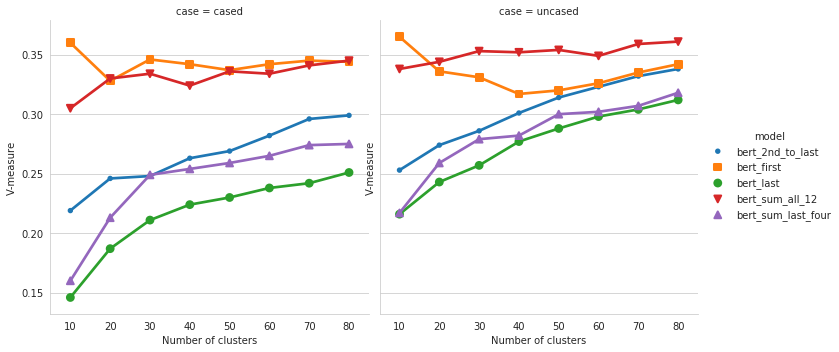

In [21]:
sns.catplot(x='nclusters', y='vmeasure', col='case',hue='model',data=diffvec_bert[diffvec_bert['sentence_source']=='word'], kind='point', markers=markers).set(ylabel='V-measure', xlabel='Number of clusters')

In [58]:
diffvec_bert_elmo = diffvec[diffvec['class']=='bert_elmo']

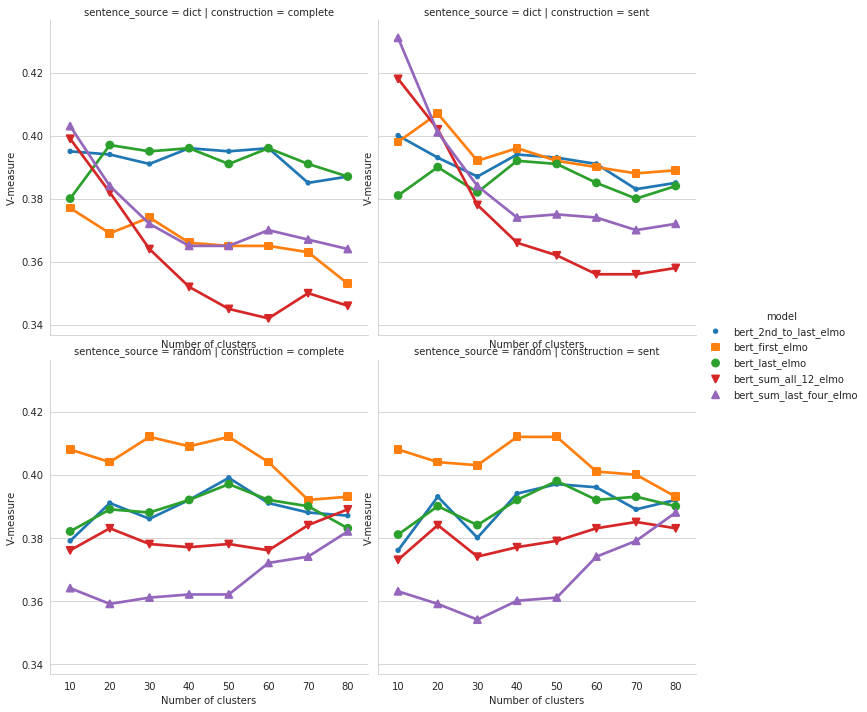

In [61]:
sns.catplot(x='nclusters', y='vmeasure', row='sentence_source', col='construction',hue='model',data=diffvec_bert_elmo[diffvec_bert_elmo['construction']!='word'], kind='point', markers=markers).set(ylabel='V-measure', xlabel='Number of clusters')

In [23]:
diffvec_glove = diffvec[diffvec['class'].str.contains('glove')]

In [96]:
sns.choose_colorbrewer_palette('qualitative')

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]

In [97]:
diffvec_palette = sns.color_palette("Dark2", 18)

In [25]:
diffvec_glove.loc[diffvec_glove['model'].str.contains('100'),  'glove_size'] = 100
diffvec_glove.loc[diffvec_glove['model'].str.contains('200'),  'glove_size'] = 200
diffvec_glove.loc[diffvec_glove['model'].str.contains('300'),  'glove_size'] = 300

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


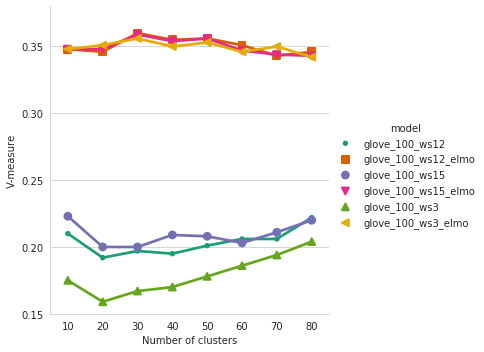

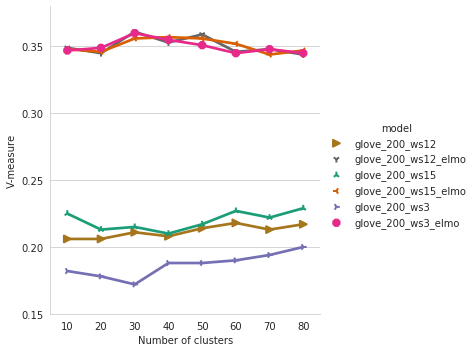

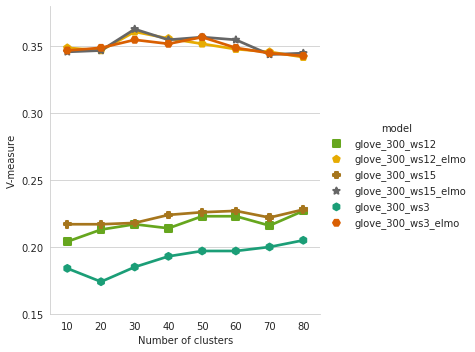

In [27]:
sns.catplot(x='nclusters', y='vmeasure',hue='model',data=diffvec_glove[diffvec_glove['glove_size']==100], kind='point', markers=markers, palette=diffvec_palette).set(ylabel='V-measure', xlabel='Number of clusters', ylim=(0.15, 0.38))
sns.catplot(x='nclusters', y='vmeasure',hue='model',data=diffvec_glove[diffvec_glove['glove_size']==200], kind='point', markers=markers[6:], palette=diffvec_palette[6:]).set(ylabel='V-measure', xlabel='Number of clusters', ylim=(0.15, 0.38))
sns.catplot(x='nclusters', y='vmeasure',hue='model',data=diffvec_glove[diffvec_glove['glove_size']==300], kind='point', markers=markers[12:], palette=diffvec_palette[12:]).set(ylabel='V-measure', xlabel='Number of clusters', ylim=(0.15, 0.38))

In [67]:
diffvec_best = diffvec[diffvec['unique_name'].isin(["bert_sum_all_12_complete_all_cased","bert_sum_all_12_complete_random_uncased","bert_sum_last_four_sent_all_cased","bert_2nd_to_last_complete_all_cased","bert_first_sent_random_uncased","bert_last_complete_random_uncased","bert_first_elmo_sent_random_uncased","bert_last_elmo_complete_dict_uncased","bert_2nd_to_last_elmo_complete_dict_uncased","glove_300_ws15_elmo","glove_300_ws15","elmo","w2v_50M","ft_50M","d2v_50M","dft_50M"])]

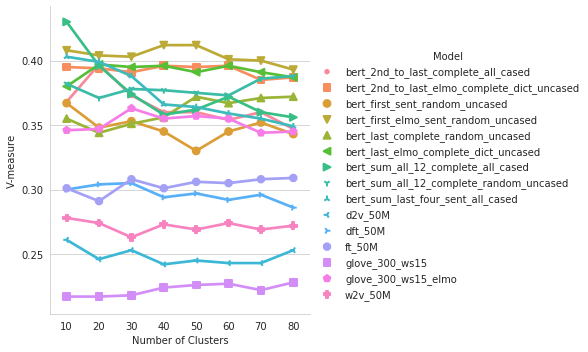

In [74]:
sns.catplot(x='nclusters', y='vmeasure', hue='unique_name',data=diffvec_best, kind='point', legend=False, markers=markers).set(xlabel="Number of Clusters", ylabel="V-measure").add_legend(title="Model")

In [94]:
diffvec_best1 = diffvec[diffvec['unique_name'].isin(["bert_sum_all_12_complete_random_uncased","bert_2nd_to_last_complete_all_cased","bert_sum_last_four_sent_all_cased","bert_last_elmo_complete_dict_uncased","bert_first_elmo_sent_random_uncased","glove_300_ws15_elmo","d2v_50M","dft_50M"])]
diffvec_best2 = diffvec[diffvec['unique_name'].isin(["bert_sum_all_12_complete_all_cased","bert_2nd_to_last_elmo_complete_dict_uncased","bert_first_sent_random_uncased","bert_last_complete_random_uncased","w2v_50M","elmo_complete_random_uncased","glove_300_ws15","ft_50M"])]

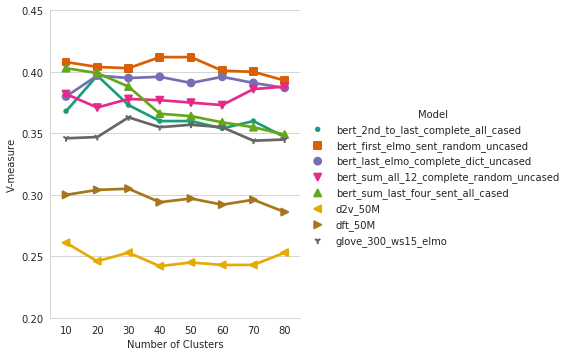

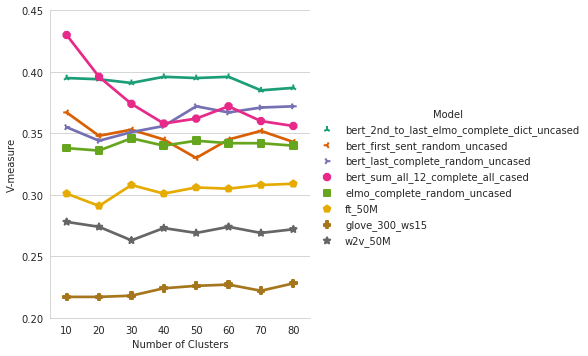

In [104]:
sns.catplot(x='nclusters', y='vmeasure', hue='unique_name',data=diffvec_best1, kind='point', legend=False, markers=markers, palette=diffvec_palette).set(xlabel="Number of Clusters", ylabel="V-measure", ylim=[0.2,0.45]).add_legend(title="Model")
sns.catplot(x='nclusters', y='vmeasure', hue='unique_name',data=diffvec_best2, kind='point', legend=False, markers=markers[8:], palette=diffvec_palette[8:]).set(xlabel="Number of Clusters", ylabel="V-measure", ylim=[0.2,0.45]).add_legend(title="Model")

In [52]:
diffvec_best1 = pd.concat([diffvec[(diffvec['case']=='uncased')&(diffvec['bert_type']).isin(['-', 'avg'])&(diffvec['dict']).isin(['-', 'yourdict'])&(diffvec['model'].isin(['bert_first', 'bert_sum_all_12', 'glove_300_ws15_elmo', 'elmo', 'ft', 'dft', 'w2v', 'ft']))], diffvec[diffvec['model'].isin(['bert_sum_all_12_elmo', 'bert_first_elmo'])]])
diffvec_best2 = pd.concat([diffvec[(diffvec['case']=='uncased')&(diffvec['bert_type']).isin(['-', 'avg'])&(diffvec['dict']).isin(['-', 'dict'])&(diffvec['model'].isin(['bert_first', 'bert_sum_all_12', 'glove_300_ws15_elmo', 'elmo', 'ft', 'dft', 'w2v', 'ft']))], diffvec[diffvec['model'].isin(['bert_sum_all_12_elmo', 'bert_first_elmo'])]])

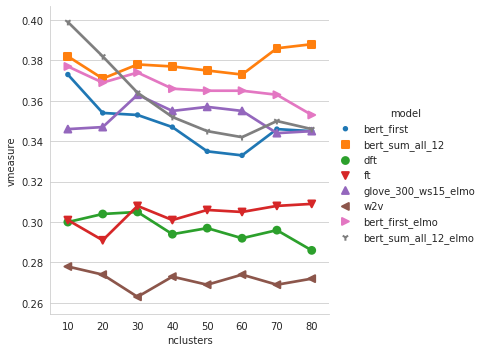

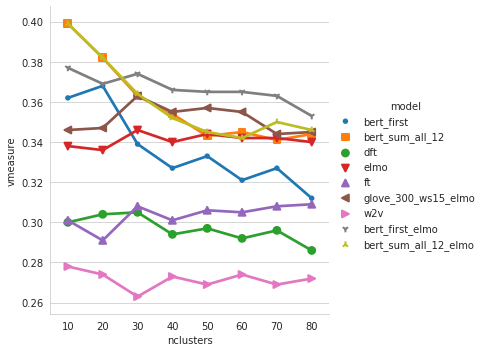

In [53]:
sns.catplot(x='nclusters', y='vmeasure', hue='model',data=diffvec_best1, kind='point', markers=markers)
sns.catplot(x='nclusters', y='vmeasure', hue='model',data=diffvec_best2, kind='point', markers=markers)

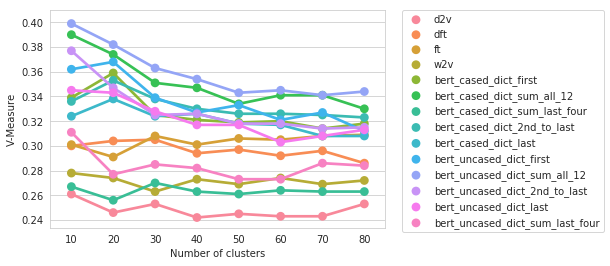

In [81]:
sns.pointplot("nclusters", "vmeasure", data=diffvec, hue='model')
plt.xlabel('Number of clusters')
plt.ylabel('V-Measure')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

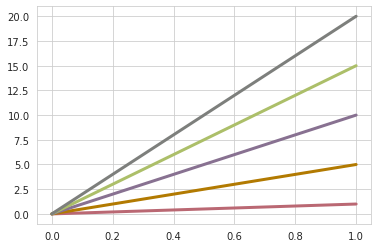

In [24]:
plt.plot([0.0, 1], [0.0, 1], sns.xkcd_rgb['dusky rose'], lw=3)
plt.plot([0.0, 1], [0.0, 5], sns.xkcd_rgb['golden brown'], lw=3)
plt.plot([0.0, 1], [0.0, 10], sns.xkcd_rgb['greyish purple'], lw=3)
plt.plot([0.0, 1], [0.0, 15], sns.xkcd_rgb['light olive'], lw=3)
plt.plot([0.0, 1], [0.0, 20], sns.xkcd_rgb['medium grey'], lw=3)